In [1]:
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mping
from PIL import Image #image processing library
from sklearn.model_selection import train_test_split

In [2]:
with_mask_files = os.listdir('/kaggle/input/face-mask-dataset/data/with_mask')
print(with_mask_files[0:5])

['with_mask_3326.jpg', 'with_mask_3139.jpg', 'with_mask_696.jpg', 'with_mask_2867.jpg', 'with_mask_39.jpg']


In [3]:
without_mask_files = os.listdir('/kaggle/input/face-mask-dataset/data/without_mask')
print(without_mask_files[0:5])

['without_mask_3248.jpg', 'without_mask_2803.jpg', 'without_mask_650.jpg', 'without_mask_2060.jpg', 'without_mask_559.jpg']


In [4]:
len(with_mask_files), len(without_mask_files)

(3725, 3828)

**Creating labels-**
with mask - 1
wihtout mask - 0

In [5]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [6]:
labels = with_mask_labels + without_mask_labels

**Displaying the images-**

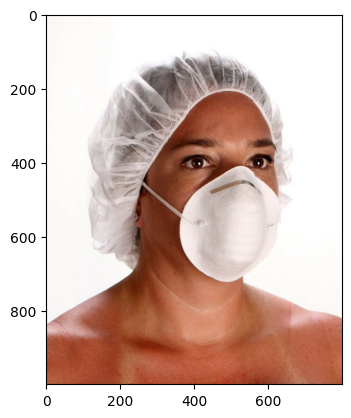

In [7]:
img = mping.imread('/kaggle/input/face-mask-dataset/data/with_mask/with_mask_3139.jpg')
#reads image in the form of numpy array
imgplt = plt.imshow(img)

**Resizing the images and converting them into numpy arrays-**

In [8]:
with_mask_path = '/kaggle/input/face-mask-dataset/data/with_mask/'  #foward slash in the end in order to concatinate it with the img_file

data = []

for img_file in with_mask_files:
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)


without_mask_path = '/kaggle/input/face-mask-dataset/data/without_mask/'

for img_file in without_mask_files:
    image = Image.open(without_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [9]:
type(data)

list

In [10]:
len(data)

7553

In [11]:
data[9]

array([[[132, 131, 126],
        [132, 131, 126],
        [134, 133, 129],
        ...,
        [113, 116, 113],
        [114, 114, 112],
        [115, 115, 113]],

       [[132, 131, 126],
        [134, 133, 128],
        [134, 133, 129],
        ...,
        [128, 129, 124],
        [129, 128, 124],
        [131, 130, 126]],

       [[134, 133, 128],
        [136, 135, 130],
        [136, 135, 131],
        ...,
        [144, 142, 136],
        [145, 142, 136],
        [147, 144, 138]],

       ...,

       [[149, 139, 137],
        [149, 139, 137],
        [150, 140, 138],
        ...,
        [113, 103, 101],
        [113,  99,  98],
        [115,  84,  86]],

       [[148, 138, 136],
        [149, 139, 137],
        [150, 140, 138],
        ...,
        [115, 105, 103],
        [115, 100,  99],
        [116,  83,  84]],

       [[148, 138, 136],
        [149, 139, 137],
        [150, 140, 138],
        ...,
        [117, 105, 104],
        [116,  98,  97],
        [114,  79,  80]]

In [12]:
type(data[0])

numpy.ndarray

In [13]:
data[0].shape

(128, 128, 3)

In [19]:
x = np.array(data)
x = x/255.0

y = np.array(labels)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [21]:
x_train[0]

array([[[0.18823529, 0.18823529, 0.23529412],
        [0.16862745, 0.16862745, 0.21176471],
        [0.14117647, 0.14117647, 0.18039216],
        ...,
        [0.36078431, 0.30196078, 0.2745098 ],
        [0.36470588, 0.30980392, 0.28235294],
        [0.36862745, 0.31764706, 0.28627451]],

       [[0.18823529, 0.18823529, 0.23529412],
        [0.16862745, 0.16862745, 0.21568627],
        [0.14117647, 0.14117647, 0.18039216],
        ...,
        [0.36078431, 0.30196078, 0.2745098 ],
        [0.36470588, 0.30980392, 0.27843137],
        [0.36862745, 0.31764706, 0.28627451]],

       [[0.17647059, 0.17647059, 0.22352941],
        [0.14901961, 0.14901961, 0.19215686],
        [0.12156863, 0.12156863, 0.16078431],
        ...,
        [0.36862745, 0.30980392, 0.29019608],
        [0.36470588, 0.30588235, 0.28235294],
        [0.36470588, 0.30588235, 0.27843137]],

       ...,

       [[0.05882353, 0.0627451 , 0.08235294],
        [0.05882353, 0.0627451 , 0.08235294],
        [0.0627451 , 0

In [23]:
import tensorflow as tf
from tensorflow import keras

In [24]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (128, 128, 3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5)) #to help overfitting

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [26]:
#training the model

history = model.fit(x_train, y_train, validation_split = 0.1, epochs = 5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 75s 430ms/step - accuracy: 0.6830 - loss: 0.7318 - val_accuracy: 0.9008 - val_loss: 0.2296
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 69s 403ms/step - accuracy: 0.8879 - loss: 0.2940 - val_accuracy: 0.8595 - val_loss: 0.2875
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 69s 406ms/step - accuracy: 0.8950 - loss: 0.2496 - val_accuracy: 0.9388 - val_loss: 0.1624
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 68s 401ms/step - accuracy: 0.9187 - loss: 0.1999 - val_accuracy: 0.9405 - val_loss: 0.1519
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 70s 409ms/step - accuracy: 0.9449 - loss: 0.1468 - val_accuracy: 0.9405 - val_loss: 0.1680


In [28]:
#model evaluation-

loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy = ', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.9217 - loss: 0.2430
Test accuracy =  0.9265387058258057


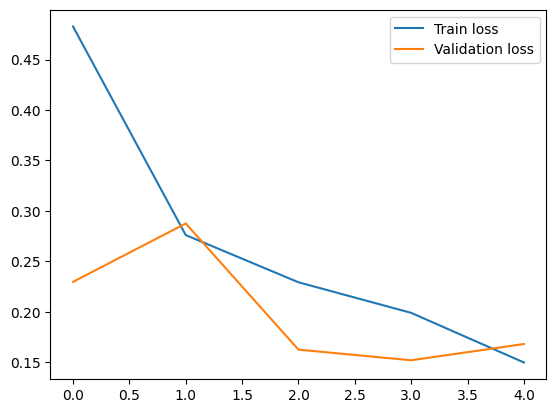

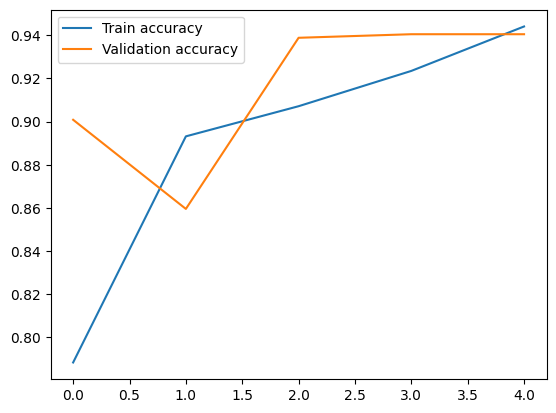

In [30]:
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.legend()
plt.show()